# Caltech Machine Learning Homework # 4

In [115]:
import numpy as np
from sklearn.linear_model import Perceptron
import random
import math
import matplotlib.pyplot as plt
from typing import List
from itertools import product
import scipy.special
from scipy import optimize

Instructions: https://work.caltech.edu/homework/hw4.pdf

Answers: http://work.caltech.edu/homework/hw4_sol.pdf

## Generalization Error

![](imgs/genererr1.png)

Plugging the given numbers into the VC Inequality on WolframAlpha gives the following numerical approximation:

![](imgs/generrsol1.png)

So it looks like (d) is closest.

![](imgs/genererr2.png)

float128


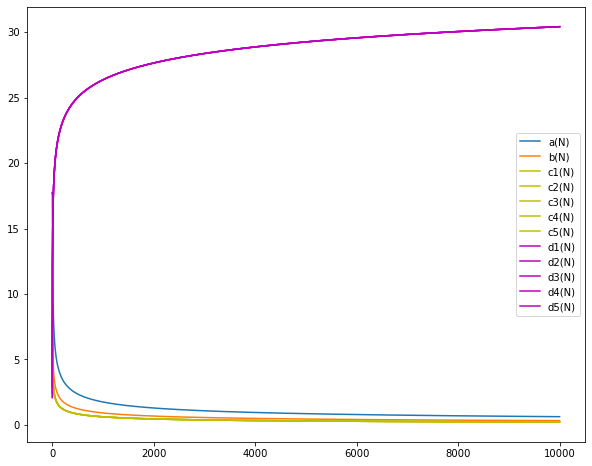

In [106]:
d_vc = 50
delta = 0.05

N = np.arange(1, 10000, 0.5, dtype=np.float128)

def a(N):
    m_H = (2*N)**d_vc # Approximate bound for growth function
    return math.sqrt( (8 / N) * np.log( (4*m_H) / delta ) )
  
def b(N):
    m_H = N**d_vc # Approximate bound for growth function
    return math.sqrt( (2 * np.log(float(2*N*m_H)) / N ) ) + math.sqrt( (2/N) * np.log(1/delta + 1/N) )
   
# How do we deal with the implicit epsilon?
# Let's looks at a few extreme values of epsilon?
e_min = 0
e_small = 0.01
e = 0.5
e_large = 0.99
e_max = 1
              
def c1(N):
    m_H = (2*N)**d_vc # Approximate bound for growth function
    return math.sqrt( (1 / N) * ( 2 * e_min + np.log( (6*m_H) / delta ) ) )              
def c2(N):
    m_H = (2*N)**d_vc # Approximate bound for growth function
    return math.sqrt( (1 / N) * ( 2 * e_small + np.log( (6*m_H) / delta ) ) )
def c3(N):
    m_H = (2*N)**d_vc # Approximate bound for growth function
    return math.sqrt( (1 / N) * ( 2 * e + np.log( (6*m_H) / delta ) ) )
def c4(N):
    m_H = (2*N)**d_vc # Approximate bound for growth function
    return math.sqrt( (1 / N) * ( 2 * e_large + np.log( (6*m_H) / delta ) ) )
def c5(N):
    m_H = (2*N)**d_vc # Approximate bound for growth function
    return math.sqrt( (1 / N) * ( 2 * e_max + np.log( (6*m_H) / delta ) ) )
    
def d1(N):
    m_H = np.power(np.power(N, 2), d_vc) # Approximate bound for growth function
    return np.sqrt( (1/(2*N)) * (4*e_min*(1+e_min)) + np.log( (4*m_H) / delta ) )
def d2(N):
    m_H = np.power(np.power(N, 2), d_vc) # Approximate bound for growth function
    return np.sqrt( (1/(2*N)) * (4*e_small*(1+e_small)) + np.log( (4*m_H) / delta ) )
def d3(N):
    m_H = np.power(np.power(N, 2), d_vc) # Approximate bound for growth function
    return np.sqrt( (1/(2*N)) * (4*e*(1+e)) + np.log( (4*m_H) / delta ) )
def d4(N):
    m_H = np.power(np.power(N, 2), d_vc) # Approximate bound for growth function
    return np.sqrt( (1/(2*N)) * (4*e_large*(1+e_large)) + np.log( (4*m_H) / delta ) )
def d5(N):
    m_H = np.power(np.power(N, 2), d_vc) # Approximate bound for growth function
    return np.sqrt( (1/(2*N)) * (4*e_max*(1+e_max)) + np.log( (4*m_H) / delta ) )


plt.figure(figsize=(10, 8))    
plt.plot(N, np.vectorize(a)(N), label='a(N)')
plt.plot(N, np.vectorize(b)(N), label='b(N)')
plt.plot(N, np.vectorize(c1)(N), label='c1(N)', color='y')
plt.plot(N, np.vectorize(c2)(N), label='c2(N)', color='y')
plt.plot(N, np.vectorize(c3)(N), label='c3(N)', color='y')
plt.plot(N, np.vectorize(c4)(N), label='c4(N)', color='y')
plt.plot(N, np.vectorize(c5)(N), label='c5(N)', color='y')
plt.plot(N, np.vectorize(d1)(N), label='d1(N)', color='m')
plt.plot(N, np.vectorize(d2)(N), label='d2(N)', color='m')
plt.plot(N, np.vectorize(d3)(N), label='d3(N)', color='m')
plt.plot(N, np.vectorize(d4)(N), label='d4(N)', color='m')
plt.plot(N, np.vectorize(d5)(N), label='d5(N)', color='m')
plt.legend()
plt.show()


We can clearly exclude (d) from this, will should allow us to get a closer look at the remaining options

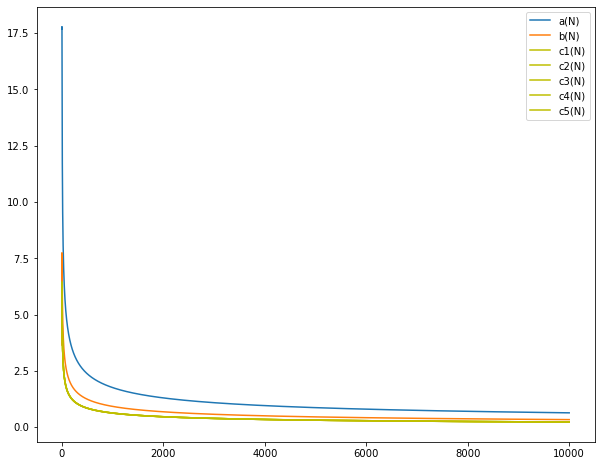

In [107]:
plt.figure(figsize=(10, 8))    
plt.plot(N, np.vectorize(a)(N), label='a(N)')
plt.plot(N, np.vectorize(b)(N), label='b(N)')
plt.plot(N, np.vectorize(c1)(N), label='c1(N)', color='y')
plt.plot(N, np.vectorize(c2)(N), label='c2(N)', color='y')
plt.plot(N, np.vectorize(c3)(N), label='c3(N)', color='y')
plt.plot(N, np.vectorize(c4)(N), label='c4(N)', color='y')
plt.plot(N, np.vectorize(c5)(N), label='c5(N)', color='y')
plt.legend()
plt.show()

Let's zoom in around the N=10,000 mark that we're interested in

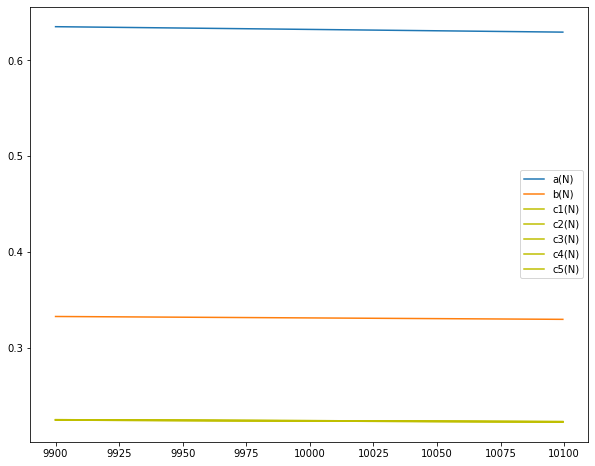

In [110]:
N = np.arange(9900, 10100, 0.5)

plt.figure(figsize=(10, 8))    
plt.plot(N, np.vectorize(a)(N), label='a(N)')
plt.plot(N, np.vectorize(b)(N), label='b(N)')
plt.plot(N, np.vectorize(c1)(N), label='c1(N)', color='y')
plt.plot(N, np.vectorize(c2)(N), label='c2(N)', color='y')
plt.plot(N, np.vectorize(c3)(N), label='c3(N)', color='y')
plt.plot(N, np.vectorize(c4)(N), label='c4(N)', color='y')
plt.plot(N, np.vectorize(c5)(N), label='c5(N)', color='y')
plt.legend()
plt.show()


Aaaaand the winner is (c)

Except I'm wrong again =)

Ah, I just had some wrong parentheses for the Devroye bound, let's do that again :)

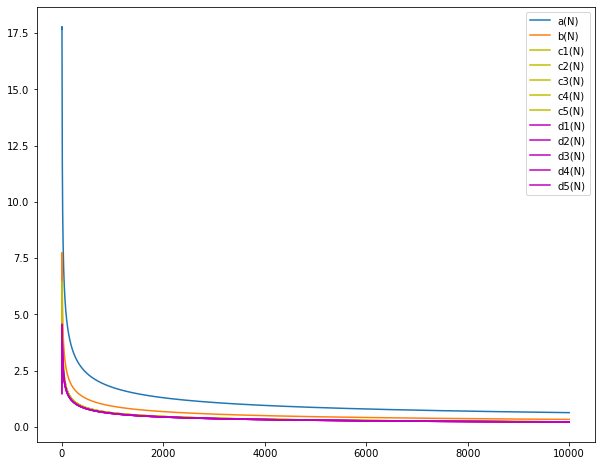

In [112]:
N = np.arange(1, 10000, 0.5, dtype=np.float128)

def d1(N):
    m_H = np.power(np.power(N, 2), d_vc) # Approximate bound for growth function
    return np.sqrt( (1/(2*N)) * ( 4*e_min*(1+e_min) + np.log( (4*m_H) / delta ) ) )
def d2(N):
    m_H = np.power(np.power(N, 2), d_vc) # Approximate bound for growth function
    return np.sqrt( (1/(2*N)) * ( 4*e_min*(1+e_small) + np.log( (4*m_H) / delta ) ) )
def d3(N):
    m_H = np.power(np.power(N, 2), d_vc) # Approximate bound for growth function
    return np.sqrt( (1/(2*N)) * ( 4*e*(1+e) + np.log( (4*m_H) / delta ) ) )
def d4(N):
    m_H = np.power(np.power(N, 2), d_vc) # Approximate bound for growth function
    return np.sqrt( (1/(2*N)) * ( 4*e_large*(1+e_large) + np.log( (4*m_H) / delta ) ) )
def d5(N):
    m_H = np.power(np.power(N, 2), d_vc) # Approximate bound for growth function
    return np.sqrt( (1/(2*N)) * ( 4*e_large*(1+e_large) + np.log( (4*m_H) / delta ) ) )

plt.figure(figsize=(10, 8))    
plt.plot(N, np.vectorize(a)(N), label='a(N)')
plt.plot(N, np.vectorize(b)(N), label='b(N)')
plt.plot(N, np.vectorize(c1)(N), label='c1(N)', color='y')
plt.plot(N, np.vectorize(c2)(N), label='c2(N)', color='y')
plt.plot(N, np.vectorize(c3)(N), label='c3(N)', color='y')
plt.plot(N, np.vectorize(c4)(N), label='c4(N)', color='y')
plt.plot(N, np.vectorize(c5)(N), label='c5(N)', color='y')
plt.plot(N, np.vectorize(d1)(N), label='d1(N)', color='m')
plt.plot(N, np.vectorize(d2)(N), label='d2(N)', color='m')
plt.plot(N, np.vectorize(d3)(N), label='d3(N)', color='m')
plt.plot(N, np.vectorize(d4)(N), label='d4(N)', color='m')
plt.plot(N, np.vectorize(d5)(N), label='d5(N)', color='m')
plt.legend()
plt.show()

Now we can exclude (a) and zoom in

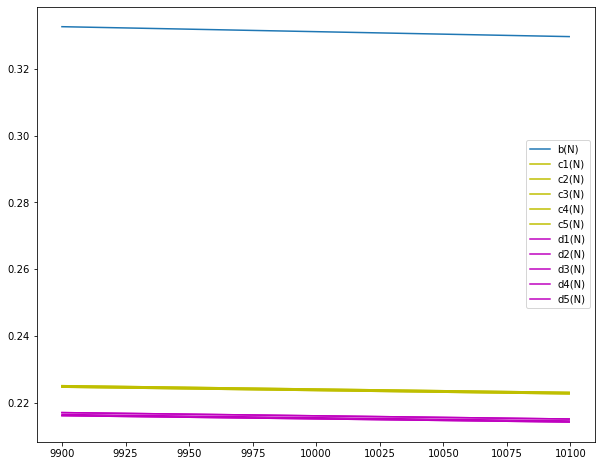

In [114]:
N = np.arange(9900, 10100, 0.5, dtype=np.float128)

plt.figure(figsize=(10, 8))    
plt.plot(N, np.vectorize(b)(N), label='b(N)')
plt.plot(N, np.vectorize(c1)(N), label='c1(N)', color='y')
plt.plot(N, np.vectorize(c2)(N), label='c2(N)', color='y')
plt.plot(N, np.vectorize(c3)(N), label='c3(N)', color='y')
plt.plot(N, np.vectorize(c4)(N), label='c4(N)', color='y')
plt.plot(N, np.vectorize(c5)(N), label='c5(N)', color='y')
plt.plot(N, np.vectorize(d1)(N), label='d1(N)', color='m')
plt.plot(N, np.vectorize(d2)(N), label='d2(N)', color='m')
plt.plot(N, np.vectorize(d3)(N), label='d3(N)', color='m')
plt.plot(N, np.vectorize(d4)(N), label='d4(N)', color='m')
plt.plot(N, np.vectorize(d5)(N), label='d5(N)', color='m')
plt.legend()
plt.show()

Aaaand the correct winner is (d) =)

I also learned from this notebook: https://nbviewer.jupyter.org/github/homefish/edX_Learning_From_Data_2017/blob/master/homework_4/homework_4_problem_2_plot_bounds.ipynb

...that instead of taking 5 "representative" values for epsilon in the implicit bounds (c) and (d), we could use a numerical solver, such as `scipy.optimize.brent`:

In [116]:
def c(N):
    m_H = (2*N)**d_vc # Approximate bound for growth function
    f = lambda e: math.sqrt( (1 / N) * ( 2 * e + np.log( (6*m_H) / delta ) ) ) - e
    return optimize.brentq(f, 0, 1)

def d1(N):
    m_H = np.power(np.power(N, 2), d_vc) # Approximate bound for growth function
    f = lambda e: np.sqrt( (1/(2*N)) * ( 4*e*(1+e) + np.log( (4*m_H) / delta ) ) ) - e
    return optimize.brentq(f, 0, 1)

N = np.arange(9900, 10100, 0.5, dtype=np.float128)

plt.figure(figsize=(10, 8))    
plt.plot(N, np.vectorize(b)(N), label='b(N)')
plt.plot(N, np.vectorize(c1)(N), label='c(N)', color='y')
plt.plot(N, np.vectorize(d1)(N), label='d1(N)', color='m')
plt.legend()
plt.show()